In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('traindata1.csv', sep = ';')
df.head()

,subject,message,label
0,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
1,[zzzzteana] RE: Alexander,"Martin A posted:\n Tassos Papadopoulos, the Gr...",0
2,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n \n Thursd...,0
3,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \n Already t...,0
4,Re: Insert signature,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",0


In [3]:
df['message'] = df['message'].str.lower()

In [4]:
df.head()

,subject,message,label
0,Re: New Sequences Window,"date: wed, 21 aug 2002 10:54:46 -05...",0
1,[zzzzteana] RE: Alexander,"martin a posted:\n tassos papadopoulos, the gr...",0
2,[zzzzteana] Moscow bomber,man threatens explosion in moscow \n \n thursd...,0
3,[IRR] Klez: The Virus That Won't Die,klez: the virus that won't die\n \n already t...,0
4,Re: Insert signature,"on wed aug 21 2002 at 15:46, ulises ponce wrot...",0


In [5]:
df.isnull().sum()

subject    11
message     0
label       0
dtype: int64

In [6]:
df.fillna(df['subject'].mode().values[0],inplace=True)

In [7]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [8]:
df['sub_mssg']=df['subject']+df['message']
df.head()

,subject,message,label,sub_mssg
0,Re: New Sequences Window,"date: wed, 21 aug 2002 10:54:46 -05...",0,"Re: New Sequences Window date: wed, ..."
1,[zzzzteana] RE: Alexander,"martin a posted:\n tassos papadopoulos, the gr...",0,[zzzzteana] RE: Alexandermartin a posted:\n ta...
2,[zzzzteana] Moscow bomber,man threatens explosion in moscow \n \n thursd...,0,[zzzzteana] Moscow bomberman threatens explosi...
3,[IRR] Klez: The Virus That Won't Die,klez: the virus that won't die\n \n already t...,0,[IRR] Klez: The Virus That Won't Dieklez: the...
4,Re: Insert signature,"on wed aug 21 2002 at 15:46, ulises ponce wrot...",0,Re: Insert signatureon wed aug 21 2002 at 15:4...


In [9]:
df['sub_mssg'].describe()

count                                                  4196
unique                                                 3982
top       The database that Bill Gates doesnt want you t...
freq                                                      5
Name: sub_mssg, dtype: object

In [10]:
df['length']=df['sub_mssg'].apply(len)
df.head()

,subject,message,label,sub_mssg,length
0,Re: New Sequences Window,"date: wed, 21 aug 2002 10:54:46 -05...",0,"Re: New Sequences Window date: wed, ...",1678
1,[zzzzteana] RE: Alexander,"martin a posted:\n tassos papadopoulos, the gr...",0,[zzzzteana] RE: Alexandermartin a posted:\n ta...,949
2,[zzzzteana] Moscow bomber,man threatens explosion in moscow \n \n thursd...,0,[zzzzteana] Moscow bomberman threatens explosi...,1813
3,[IRR] Klez: The Virus That Won't Die,klez: the virus that won't die\n \n already t...,0,[IRR] Klez: The Virus That Won't Dieklez: the...,1195
4,Re: Insert signature,"on wed aug 21 2002 at 15:46, ulises ponce wrot...",0,Re: Insert signatureon wed aug 21 2002 at 15:4...,1356


In [11]:
df.drop('subject',axis=1,inplace=True)

In [12]:
df.head()

,message,label,sub_mssg,length
0,"date: wed, 21 aug 2002 10:54:46 -05...",0,"Re: New Sequences Window date: wed, ...",1678
1,"martin a posted:\n tassos papadopoulos, the gr...",0,[zzzzteana] RE: Alexandermartin a posted:\n ta...,949
2,man threatens explosion in moscow \n \n thursd...,0,[zzzzteana] Moscow bomberman threatens explosi...,1813
3,klez: the virus that won't die\n \n already t...,0,[IRR] Klez: The Virus That Won't Dieklez: the...,1195
4,"on wed aug 21 2002 at 15:46, ulises ponce wrot...",0,Re: Insert signatureon wed aug 21 2002 at 15:4...,1356


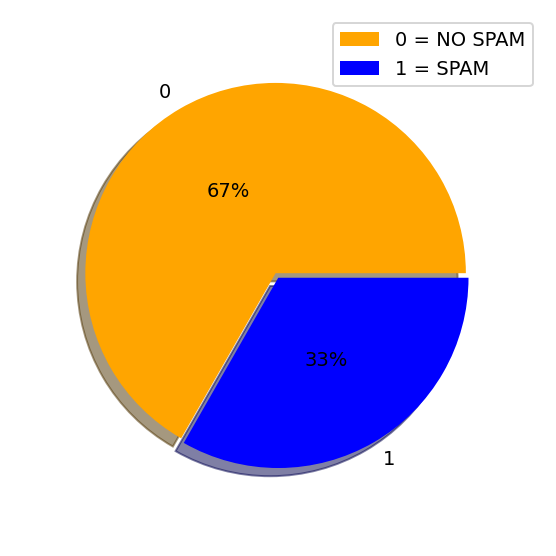

In [13]:
lb=df['label'].value_counts().index.tolist()
val=df['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [14]:
df['message'][0]

'    date:        wed, 21 aug 2002 10:54:46 -0500\n     from:        chris garrigues <cwg-dated-1030377287.06fa6d@deepeddy.com>\n     message-id:  <1029945287.4797.tmda@deepeddy.vircio.com>\n \n \n   || i can\'t reproduce this error.\n \n for me it is very repeatable... (like every time, without fail).\n \n this is the debug log of the pick happening ...\n \n 18:19:03 pick_it {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n 18:19:04 ftoc_pickmsgs {{1 hit}}\n 18:19:04 marking 1 hits\n 18:19:04 tkerror: syntax error in expression "int ...\n \n note, if i run the pick command by hand ...\n \n delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n 1 hit\n \n that\'s where the "1 hit" comes from (obviously).  the version of nmh i\'m\n using is ...\n \n delta$ pick -version\n pick -- nmh-1

In [15]:
import re

In [16]:
def decontact(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
mssg=decontact(df['message'][70])
mssg

'>>>>> "e" == eirikur hallgrimsson <eh@mad.scientist.com> writes:\n \n     e> gary is news service at teledyn.com has an article on internet\n     e> saturation.  let me ask you....if you were on a rock in the\n     e> middle of the atlantic, mostly in the dark for half the year,\n     e> would not *you* like a bit of internet distraction?  they have\n     e> already done the obvious and fiber-ringed the island.\n \n there is lots of similar places.  saskatchewan, for example, once\n shared with iceland the distinction of most telephone connections per\n capita, and for a long time shared the internet penetration lead with\n iceland (sask is a land-locked massive expanse of ultra-flat dust with\n only two rivers and farm sizes measured in the\n hundred-thousand-hectares).\n \n it is still curious iceland leads.  maybe there is just a deep cultural\n curiousity and fascination with watching advertising from the rest of\n the world. maybe they are downloading bjork videos.\n \n -- \n gar

In [18]:
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
df['sub_mssg'][0]

'Re: New Sequences Window    date:        wed, numbers aug numbers numbers:numbers:numbers -numbers\n     from:        chris garrigues <cwg-dated-numbersfanumbersd@deepeddy.com>\n     message-id:  <numbers.tmda@deepeddy.vircio.com>\n \n \n   || i can\'t reproduce this error.\n \n for me it is very repeatable... (like every time, without fail).\n \n this is the debug log of the pick happening ...\n \n numbers:numbers:numbers pick_it {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {numbers-numbers -sequence mercury}\n numbers:numbers:numbers exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace numbers-numbers -sequence mercury\n numbers:numbers:numbers ftoc_pickmsgs {{numbers hit}}\n numbers:numbers:numbers marking numbers hits\n numbers:numbers:numbers tkerror: syntax error in expression "int ...\n \n note, if i run the pick command by hand ...\n \n delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  numbers-numbers -sequence mercu

In [19]:
#CONVRTING EVERYTHING TO LOWERCASE
df['sub_mssg']=df['sub_mssg'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [20]:
#CONVRTING EVERYTHING TO LOWERCASE
df['message']=df['message'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['message']=df['message'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['message']=df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['message']=df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['message']=df['message'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['message']=df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['message']=df['message'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [21]:
df['sub_mssg'][0]

're new sequences window date wed numbers aug numbers numbers numbers numbers numbers from chris garrigues cwg dated numbersfanumbersd deepeddy com message id numbers tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening numbers numbers numbers pick it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace numbers numbers sequence mercury numbers numbers numbers exec pick inbox list lbrace lbrace subject ftp rbrace rbrace numbers numbers sequence mercury numbers numbers numbers ftoc pickmsgs numbers hit numbers numbers numbers marking numbers hits numbers numbers numbers tkerror syntax error in expression int note if i run the pick command by hand deltaMoney pick inbox list lbrace lbrace subject ftp rbrace rbrace numbers numbers sequence mercury numbers hit that s where the numbers hit comes from obviously the version of nmh i m using is deltaMoney pick version pick nmh numbers n

In [22]:
df.head()

,message,label,sub_mssg,length
0,date wed 21 aug 2002 10 54 46 0500 from chris ...,0,re new sequences window date wed numbers aug n...,1678
1,martin a posted tassos papadopoulos the greek ...,0,zzzzteana re alexandermartin a posted tassos ...,949
2,man threatens explosion in moscow thursday aug...,0,zzzzteana moscow bomberman threatens explosio...,1813
3,klez the virus that won t die already the most...,0,irr klez the virus that won t dieklez the vir...,1195
4,on wed aug 21 2002 at 15 46 ulises ponce wrote...,0,re insert signatureon wed aug numbers numbers ...,1356


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop = stopwords.words('english')
df['Cleaned_Text'] = df['sub_mssg'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [25]:
df.head()

,message,label,sub_mssg,length,Cleaned_Text
0,date wed 21 aug 2002 10 54 46 0500 from chris ...,0,re new sequences window date wed numbers aug n...,1678,new sequences window date wed numbers aug numb...
1,martin a posted tassos papadopoulos the greek ...,0,zzzzteana re alexandermartin a posted tassos ...,949,zzzzteana alexandermartin posted tassos papado...
2,man threatens explosion in moscow thursday aug...,0,zzzzteana moscow bomberman threatens explosio...,1813,zzzzteana moscow bomberman threatens explosion...
3,klez the virus that won t die already the most...,0,irr klez the virus that won t dieklez the vir...,1195,irr klez virus dieklez virus die already proli...
4,on wed aug 21 2002 at 15 46 ulises ponce wrote...,0,re insert signatureon wed aug numbers numbers ...,1356,insert signatureon wed aug numbers numbers num...


In [26]:
df.drop('message',axis=1,inplace=True)

In [27]:
df.drop('sub_mssg',axis=1,inplace=True)

In [28]:
df.head()

,label,length,Cleaned_Text
0,0,1678,new sequences window date wed numbers aug numb...
1,0,949,zzzzteana alexandermartin posted tassos papado...
2,0,1813,zzzzteana moscow bomberman threatens explosion...
3,0,1195,irr klez virus dieklez virus die already proli...
4,0,1356,insert signatureon wed aug numbers numbers num...


In [29]:
df.isnull().sum()

label           0
length          0
Cleaned_Text    0
dtype: int64

In [30]:
df['lgth_clean']=df['Cleaned_Text'].apply(len)
df.head()

,label,length,Cleaned_Text,lgth_clean
0,0,1678,new sequences window date wed numbers aug numb...,1359
1,0,949,zzzzteana alexandermartin posted tassos papado...,620
2,0,1813,zzzzteana moscow bomberman threatens explosion...,1279
3,0,1195,irr klez virus dieklez virus die already proli...,846
4,0,1356,insert signatureon wed aug numbers numbers num...,849


In [31]:
original_length=sum(df['length'])
after_cleaning=sum(df['lgth_clean'])

In [32]:
print("original_length",original_length)
print('after_cleaning',after_cleaning)

original_length 12167249
after_cleaning 9767670


In [33]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline

In [34]:
tvec = TfidfVectorizer()
lr = LogisticRegression(solver = "lbfgs")

In [35]:
X = df.Cleaned_Text
Y = df.label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

In [36]:
X

0       new sequences window date wed numbers aug numb...
1       zzzzteana alexandermartin posted tassos papado...
2       zzzzteana moscow bomberman threatens explosion...
3       irr klez virus dieklez virus die already proli...
4       insert signatureon wed aug numbers numbers num...
                              ...                        
4191    busy home study makes sense want boss train se...
4192    preferred non smoker rates smokersthis multi p...
4193    get numbers numbers free hits per day websited...
4194    cannabis difference mid summer customer apprec...
4195    ilug wilson kamelaattn sir madan strictly conf...
Name: Cleaned_Text, Length: 4196, dtype: object

In [37]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4191    1
4192    1
4193    1
4194    1
4195    1
Name: label, Length: 4196, dtype: int64

In [38]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)
model_7 = Pipeline([('vectorizer',tvec),('classifier',rfc)])
model_7.fit(X_train,Y_train)
y_pred = model_7.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[276   8]
 [  4 132]]
Accuracy :  0.9714285714285714
Precision :  0.9718367346938775
Recall :  0.9714285714285714


In [39]:
df

,label,length,Cleaned_Text,lgth_clean
0,0,1678,new sequences window date wed numbers aug numb...,1359
1,0,949,zzzzteana alexandermartin posted tassos papado...,620
2,0,1813,zzzzteana moscow bomberman threatens explosion...,1279
3,0,1195,irr klez virus dieklez virus die already proli...,846
4,0,1356,insert signatureon wed aug numbers numbers num...,849
...,...,...,...,...
4191,1,2557,busy home study makes sense want boss train se...,1584
4192,1,12612,preferred non smoker rates smokersthis multi p...,10457
4193,1,2575,get numbers numbers free hits per day websited...,1658
4194,1,24078,cannabis difference mid summer customer apprec...,19478


# Проверка на тестовых данных 

In [40]:
df1=pd.read_csv('final.csv')
df1.head()

,Unnamed: 0.1,Unnamed: 0,subject,text,label
0,0,0,ADV: Professional Teeth Whitening At Home! ...,Whiter teeth and a brighter smile are just a c...,1
1,1,1,"Your Membership Community & Commentary, 08-03-01",\n--1465727098.996838841831.JavaMail.RovAdmin....,1
2,2,2,ore info/grant money,Below is the result of your feedback form. It...,1
3,3,3,Sometimes Less is More...,Maximizer Select\t\n Want to pay less for ter...,1
4,4,4,adv: Put your resume back to work,"Dear Candidate,\n\nWe recently came across a p...",1


In [41]:
df1 = df1.drop('Unnamed: 0',axis = 1)

In [42]:
df1

,Unnamed: 0.1,subject,text,label
0,0,ADV: Professional Teeth Whitening At Home! ...,Whiter teeth and a brighter smile are just a c...,1
1,1,"Your Membership Community & Commentary, 08-03-01",\n--1465727098.996838841831.JavaMail.RovAdmin....,1
2,2,ore info/grant money,Below is the result of your feedback form. It...,1
3,3,Sometimes Less is More...,Maximizer Select\t\n Want to pay less for ter...,1
4,4,adv: Put your resume back to work,"Dear Candidate,\n\nWe recently came across a p...",1
...,...,...,...,...
1009,588,Selling Wedded Bliss (was Re: Ouch...),"I dunno, BB. Women who like to be thought of ...",0
1010,589,Java is for kiddies,"<snip>\nMisc rants about finding jobs, java vs...",0
1011,590,[ILUG] rpm dependencies,"On Sat, Oct 05, 2002 at 06:06:14PM +0100, Padr...",0
1012,591,a problem with apt-get,"On Mon, 7 Oct 2002, Thomas Vander Stichele wro...",0


In [43]:
df1 = df1.drop('Unnamed: 0.1',axis = 1)

In [44]:
df1['message'] = df1['text']

In [45]:
df1

,subject,text,label,message
0,ADV: Professional Teeth Whitening At Home! ...,Whiter teeth and a brighter smile are just a c...,1,Whiter teeth and a brighter smile are just a c...
1,"Your Membership Community & Commentary, 08-03-01",\n--1465727098.996838841831.JavaMail.RovAdmin....,1,\n--1465727098.996838841831.JavaMail.RovAdmin....
2,ore info/grant money,Below is the result of your feedback form. It...,1,Below is the result of your feedback form. It...
3,Sometimes Less is More...,Maximizer Select\t\n Want to pay less for ter...,1,Maximizer Select\t\n Want to pay less for ter...
4,adv: Put your resume back to work,"Dear Candidate,\n\nWe recently came across a p...",1,"Dear Candidate,\n\nWe recently came across a p..."
...,...,...,...,...
1009,Selling Wedded Bliss (was Re: Ouch...),"I dunno, BB. Women who like to be thought of ...",0,"I dunno, BB. Women who like to be thought of ..."
1010,Java is for kiddies,"<snip>\nMisc rants about finding jobs, java vs...",0,"<snip>\nMisc rants about finding jobs, java vs..."
1011,[ILUG] rpm dependencies,"On Sat, Oct 05, 2002 at 06:06:14PM +0100, Padr...",0,"On Sat, Oct 05, 2002 at 06:06:14PM +0100, Padr..."
1012,a problem with apt-get,"On Mon, 7 Oct 2002, Thomas Vander Stichele wro...",0,"On Mon, 7 Oct 2002, Thomas Vander Stichele wro..."


In [46]:
df1['message'] = df1['message'].str.lower()

In [47]:
df1.isnull().sum()

subject    2
text       6
label      0
message    6
dtype: int64

In [48]:
df1.fillna(df1['subject'].mode().values[0],inplace=True)

In [49]:
df1.isnull().sum()

subject    0
text       0
label      0
message    0
dtype: int64

In [50]:
df1['sub_mssg']=df1['subject']+df1['message']
df1.head()

,subject,text,label,message,sub_mssg
0,ADV: Professional Teeth Whitening At Home! ...,Whiter teeth and a brighter smile are just a c...,1,whiter teeth and a brighter smile are just a c...,ADV: Professional Teeth Whitening At Home! ...
1,"Your Membership Community & Commentary, 08-03-01",\n--1465727098.996838841831.JavaMail.RovAdmin....,1,\n--1465727098.996838841831.javamail.rovadmin....,"Your Membership Community & Commentary, 08-03-..."
2,ore info/grant money,Below is the result of your feedback form. It...,1,below is the result of your feedback form. it...,ore info/grant moneybelow is the result of you...
3,Sometimes Less is More...,Maximizer Select\t\n Want to pay less for ter...,1,maximizer select\t\n want to pay less for ter...,Sometimes Less is More... maximizer select\t\n...
4,adv: Put your resume back to work,"Dear Candidate,\n\nWe recently came across a p...",1,"dear candidate,\n\nwe recently came across a p...",adv: Put your resume back to workdear candidat...


In [51]:
df1['sub_mssg'].describe()

count                                                  1014
unique                                                  983
top       Sourceforge sells outurl: http://www.askbjoern...
freq                                                      3
Name: sub_mssg, dtype: object

In [52]:
df1['length']=df1['sub_mssg'].apply(len)
df1.head()

,subject,text,label,message,sub_mssg,length
0,ADV: Professional Teeth Whitening At Home! ...,Whiter teeth and a brighter smile are just a c...,1,whiter teeth and a brighter smile are just a c...,ADV: Professional Teeth Whitening At Home! ...,856
1,"Your Membership Community & Commentary, 08-03-01",\n--1465727098.996838841831.JavaMail.RovAdmin....,1,\n--1465727098.996838841831.javamail.rovadmin....,"Your Membership Community & Commentary, 08-03-...",35024
2,ore info/grant money,Below is the result of your feedback form. It...,1,below is the result of your feedback form. it...,ore info/grant moneybelow is the result of you...,1136
3,Sometimes Less is More...,Maximizer Select\t\n Want to pay less for ter...,1,maximizer select\t\n want to pay less for ter...,Sometimes Less is More... maximizer select\t\n...,1283
4,adv: Put your resume back to work,"Dear Candidate,\n\nWe recently came across a p...",1,"dear candidate,\n\nwe recently came across a p...",adv: Put your resume back to workdear candidat...,1468


In [53]:
df1.drop('subject',axis=1,inplace=True)

In [54]:
df1

,text,label,message,sub_mssg,length
0,Whiter teeth and a brighter smile are just a c...,1,whiter teeth and a brighter smile are just a c...,ADV: Professional Teeth Whitening At Home! ...,856
1,\n--1465727098.996838841831.JavaMail.RovAdmin....,1,\n--1465727098.996838841831.javamail.rovadmin....,"Your Membership Community & Commentary, 08-03-...",35024
2,Below is the result of your feedback form. It...,1,below is the result of your feedback form. it...,ore info/grant moneybelow is the result of you...,1136
3,Maximizer Select\t\n Want to pay less for ter...,1,maximizer select\t\n want to pay less for ter...,Sometimes Less is More... maximizer select\t\n...,1283
4,"Dear Candidate,\n\nWe recently came across a p...",1,"dear candidate,\n\nwe recently came across a p...",adv: Put your resume back to workdear candidat...,1468
...,...,...,...,...,...
1009,"I dunno, BB. Women who like to be thought of ...",0,"i dunno, bb. women who like to be thought of ...","Selling Wedded Bliss (was Re: Ouch...)i dunno,...",3419
1010,"<snip>\nMisc rants about finding jobs, java vs...",0,"<snip>\nmisc rants about finding jobs, java vs...",Java is for kiddies<snip>\nmisc rants about fi...,3863
1011,"On Sat, Oct 05, 2002 at 06:06:14PM +0100, Padr...",0,"on sat, oct 05, 2002 at 06:06:14pm +0100, padr...","[ILUG] rpm dependencieson sat, oct 05, 2002 at...",1138
1012,"On Mon, 7 Oct 2002, Thomas Vander Stichele wro...",0,"on mon, 7 oct 2002, thomas vander stichele wro...","a problem with apt-geton mon, 7 oct 2002, thom...",1061


In [55]:
df1['message'][0]

'whiter teeth and a brighter smile are just a click away! \nhttp://www.newnamedns.com/dental/\n\nhave you considered professional teeth whitening? if so, you know it usually costs between $300 and $500 from your local dentist!\n\nvisit our site to learn how to professionally whiten your teeth, using the exact same whitening system your dentist uses, at a fraction of the cost!\n\nwe know our product is the best on the market, and we back it with a 30 day money back guarantee!\n\nclick here to find out more!\nhttp://www.newnamedns.com/dental/\n         \n        \n        \n        \n       \n---------------------------------------\nto easily remove your address from the list, go to: \nhttp://www.newnamedns.com/stopthemailplease/\nplease allow 48-72 hours for removal.\n\n'

In [56]:
mssg=decontact(df1['message'][70])
mssg

'we ship worldwide within 24 hours!\n\nno waiting rooms, drug stores, or embarrassing conversations. \nour licensed pharmacists will have your order to you in 1 or 2 days!\nclick this link to get started today!   \nhttp://www.atlanticmeds.com/main2.php?rx=17692\n   \nviagra and many other prescription drugs available, including: \n   \nxenical and phentermine, weight loss medications used to help\noverweight people lose weight and keep this weight off. \n\nvaltrex, treatement for herpes. \n   \npropecia, the first pill that effectively treats\nmale pattern hair loss. \nhttp://www.atlanticmeds.com/main2.php?rx=17692\nzyban, zyban is the first nicotine-free pill that,\nas part of a  comprehensive program from \nyour health care  professional, can help you\nstop smoking. \nhttp://www.atlanticmeds.com/main2.php?rx=17692\nclaritin, provides effective relief from the  symptoms \nof seasonal allergies.  and much more... \n\ncilck this link to get started today!\nhttp://www.atlanticmeds.com/ma

In [57]:
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
df1['sub_mssg'][0]

'ADV: Professional Teeth Whitening At Home!                                                   ovcndwhiter teeth and a brighter smile are just a click away! \nhttp://www.newnamedns.com/dental/\n\nhave you considered professional teeth whitening? if so, you know it usually costs between $numbers and $numbers from your local dentist!\n\nvisit our site to learn how to professionally whiten your teeth, using the exact same whitening system your dentist uses, at a fraction of the cost!\n\nwe know our product is the best on the market, and we back it with a numbers day money back guarantee!\n\nclick here to find out more!\nhttp://www.newnamedns.com/dental/\n         \n        \n        \n        \n       \n---------------------------------------\nto easily remove your address from the list, go to: \nhttp://www.newnamedns.com/stopthemailplease/\nplease allow numbers-numbers hours for removal.\n\n'

In [58]:
#CONVRTING EVERYTHING TO LOWERCASE
df1['sub_mssg']=df1['sub_mssg'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df1['sub_mssg']=df1['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df1['sub_mssg']=df1['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [59]:
#CONVRTING EVERYTHING TO LOWERCASE
df1['message']=df1['message'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df1['message']=df1['message'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df1['message']=df1['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df1['message']=df1['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df1['message']=df1['message'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df1['message']=df1['message'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df1['message']=df1['message'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df1['message']=df1['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df1['message']=df1['message'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [60]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
# removing stopwords 
stop = stopwords.words('english')
df1['Cleaned_Text'] = df1['sub_mssg'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [61]:
df.head()

,label,length,Cleaned_Text,lgth_clean
0,0,1678,new sequences window date wed numbers aug numb...,1359
1,0,949,zzzzteana alexandermartin posted tassos papado...,620
2,0,1813,zzzzteana moscow bomberman threatens explosion...,1279
3,0,1195,irr klez virus dieklez virus die already proli...,846
4,0,1356,insert signatureon wed aug numbers numbers num...,849


In [62]:
df1.drop('message',axis=1,inplace=True)

In [63]:
df1.drop('sub_mssg',axis=1,inplace=True)

In [64]:
df1['lgth_clean']=df1['Cleaned_Text'].apply(len)
df1.head()

,text,label,length,Cleaned_Text,lgth_clean
0,Whiter teeth and a brighter smile are just a c...,1,856,adv professional teeth whitening home ovcndwhi...,532
1,\n--1465727098.996838841831.JavaMail.RovAdmin....,1,35024,membership community commentary numbers number...,24786
2,Below is the result of your feedback form. It...,1,1136,ore info grant moneybelow result feedback form...,705
3,Maximizer Select\t\n Want to pay less for ter...,1,1283,sometimes less maximizer select want pay less ...,930
4,"Dear Candidate,\n\nWe recently came across a p...",1,1468,adv put resume back workdear candidate recentl...,974


In [65]:
testX = df1.Cleaned_Text
tesY = df1.label

In [66]:
testX

0       adv professional teeth whitening home ovcndwhi...
1       membership community commentary numbers number...
2       ore info grant moneybelow result feedback form...
3       sometimes less maximizer select want pay less ...
4       adv put resume back workdear candidate recentl...
                              ...                        
1009    selling wedded bliss ouch dunno bb women like ...
1010    java kiddies snip misc rants finding jobs java...
1011    ilug rpm dependencieson sat oct numbers number...
1012    problem apt geton mon numbers oct numbers thom...
1013    goodbye global warming historical record mean ...
Name: Cleaned_Text, Length: 1014, dtype: object

In [67]:
tesY

0       1
1       1
2       1
3       1
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    0
Name: label, Length: 1014, dtype: int64

In [68]:
y_pred1 = model_7.predict(testX)

**Метрики**

In [69]:
print("Accuracy : ", accuracy_score(y_pred1,tesY))

Accuracy :  0.928007889546351


In [70]:
print("Precision : ", precision_score(y_pred1,tesY, average = 'weighted'))
print("Recall : ", recall_score(y_pred1,tesY, average = 'weighted'))

Precision :  0.9392543043037622
Recall :  0.928007889546351


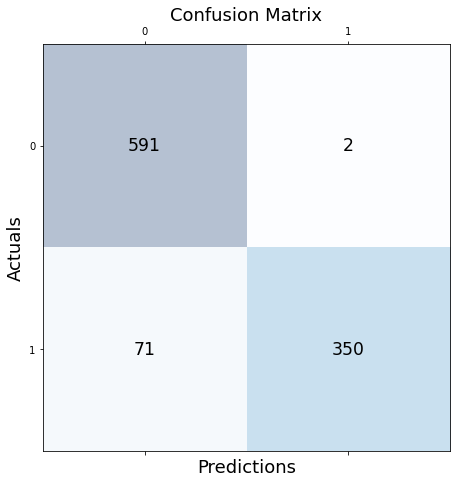

In [71]:
conf_matrix = confusion_matrix(y_true=tesY, y_pred=y_pred1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Тестирование моделей

**Logistic Regression**

In [72]:
tvec = TfidfVectorizer()
lr = LogisticRegression(solver = "lbfgs")

In [73]:
X = df.Cleaned_Text
Y = df.label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

In [74]:
model = Pipeline([('vectorizer',tvec),('classifier',lr)])
model.fit(X_train,Y_train)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_pred,Y_test)

array([[279,  14],
       [  1, 126]])

In [75]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.9642857142857143
Precision :  0.9672704081632654
Recall :  0.9642857142857143


**LR - на тестовых**

In [76]:
y_pred2 = model.predict(testX)

In [77]:
print("Accuracy : ", accuracy_score(y_pred2,tesY))
print("Precision : ", precision_score(y_pred2,tesY, average = 'weighted'))
print("Recall : ", recall_score(y_pred2,tesY, average = 'weighted'))

Accuracy :  0.9043392504930966
Precision :  0.9247259258967817
Recall :  0.9043392504930966


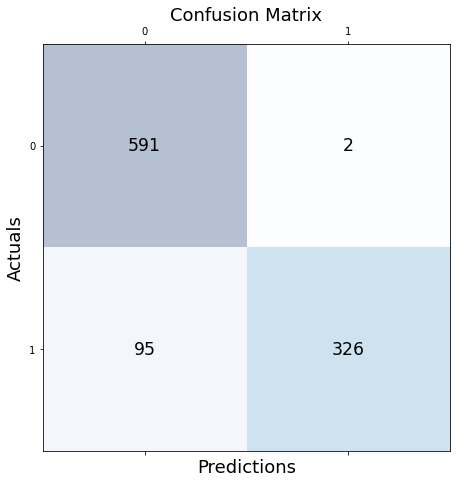

In [78]:
conf_matrix = confusion_matrix(y_true=tesY, y_pred=y_pred2)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# KNeighbors Classifier

In [79]:
knc = KNeighborsClassifier()
model_1 = Pipeline([('vectorizer',tvec),('classifier',knc)])
model_1.fit(X_train,Y_train)
y_pred = model_1.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[236   9]
 [ 44 131]]
Accuracy :  0.8738095238095238
Precision :  0.881547619047619
Recall :  0.8738095238095238


**На тестовых данных**

In [80]:
y_pred3 = model_1.predict(testX)

In [81]:
print("Accuracy : ", accuracy_score(y_pred3,tesY))
print("Precision : ", precision_score(y_pred3,tesY, average = 'weighted'))
print("Recall : ", recall_score(y_pred3,tesY, average = 'weighted'))

Accuracy :  0.8520710059171598
Precision :  0.852653637094441
Recall :  0.8520710059171598


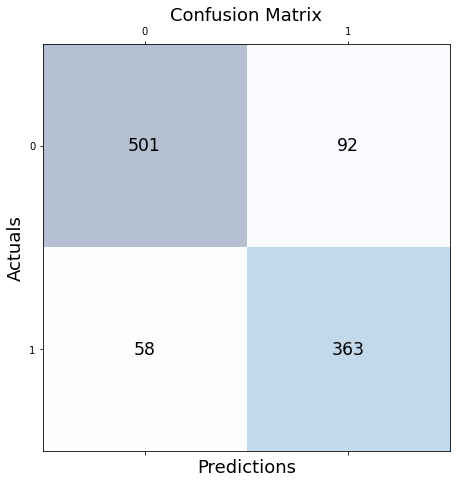

In [82]:
conf_matrix = confusion_matrix(y_true=tesY, y_pred=y_pred3)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Ada Boost Classifier**

In [83]:
abc = AdaBoostClassifier()
model_3 = Pipeline([('vectorizer',tvec),('classifier',abc)])
model_3.fit(X_train,Y_train)
y_pred = model_3.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[274   9]
 [  6 131]]
Accuracy :  0.9642857142857143
Precision :  0.9645918367346937
Recall :  0.9642857142857143


**На тестовых данных**

In [84]:
y_pred4 = model_3.predict(testX)

In [85]:
print("Accuracy : ", accuracy_score(y_pred4,tesY))
print("Precision : ", precision_score(y_pred4,tesY, average = 'weighted'))
print("Recall : ", recall_score(y_pred4,tesY, average = 'weighted'))

Accuracy :  0.9201183431952663
Precision :  0.9309524934218162
Recall :  0.9201183431952663


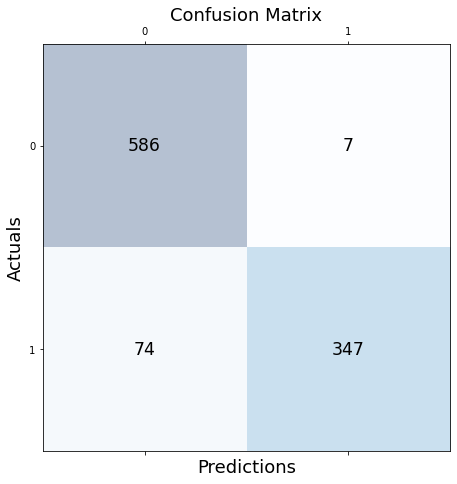

In [86]:
conf_matrix = confusion_matrix(y_true=tesY, y_pred=y_pred4)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Naive Bayes**

In [87]:
mnb = MultinomialNB()
model_5 = Pipeline([('vectorizer',tvec),('classifier',mnb)])
model_5.fit(X_train,Y_train)
y_pred = model_5.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[278  30]
 [  2 110]]
Accuracy :  0.9238095238095239
Precision :  0.9376190476190477
Recall :  0.9238095238095239


**На тестовых данных**

In [88]:
y_pred5 = model_5.predict(testX)

In [89]:
print("Accuracy : ", accuracy_score(y_pred5,tesY))
print("Precision : ", precision_score(y_pred5,tesY, average = 'weighted'))
print("Recall : ", recall_score(y_pred5,tesY, average = 'weighted'))

Accuracy :  0.8392504930966469
Precision :  0.9000798749690212
Recall :  0.8392504930966469


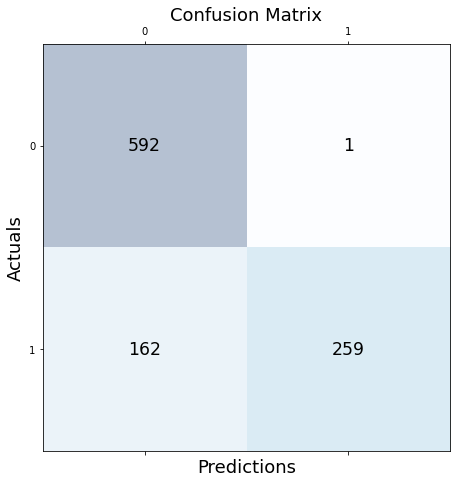

In [90]:
conf_matrix = confusion_matrix(y_true=tesY, y_pred=y_pred5)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Gradient Boosting Classifier**

In [91]:
gbc = GradientBoostingClassifier()
model_6= Pipeline([('vectorizer',tvec),('classifier',gbc)])
model_6.fit(X_train,Y_train)
y_pred = model_6.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[277  15]
 [  3 125]]
Accuracy :  0.9571428571428572
Precision :  0.9598979591836735
Recall :  0.9571428571428572


**Тестовые данные**

In [92]:
y_pred6 = model_6.predict(testX)

In [93]:
print("Accuracy : ", accuracy_score(y_pred6,tesY))
print("Precision : ", precision_score(y_pred6,tesY, average = 'weighted'))
print("Recall : ", recall_score(y_pred6,tesY, average = 'weighted'))

Accuracy :  0.8974358974358975
Precision :  0.9227723978317802
Recall :  0.8974358974358975


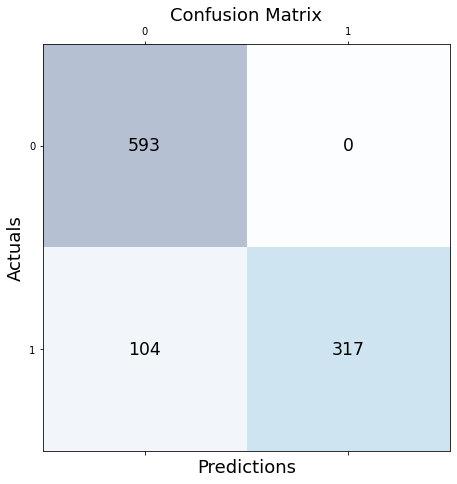

In [94]:
conf_matrix = confusion_matrix(y_true=tesY, y_pred=y_pred6)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Вывод:**

У модели Random Forest Classifier самые большие показатели метрик

# Random Forest Classifier

In [95]:
iterators = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [97]:
from sklearn.ensemble import RandomForestClassifier as RFC
for i in iterators:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = i, random_state = 225,stratify=Y)
  rfc = RFC(random_state=42)
  model_7 = Pipeline([('vectorizer',tvec),('classifier',rfc)])
  model_7.fit(X_train,Y_train)
  y_pred = model_7.predict(X_test)
  print("------------------------")
  print("test-size = ", i)
  print("Accuracy : ", accuracy_score(y_pred,Y_test))
  print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
  print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))
  print("------------------------")
  print("На тестовом наборе")
  y_pred1 = model_7.predict(testX)
  print("Accuracy : ", accuracy_score(y_pred1,tesY))
  print("Precision : ", precision_score(y_pred1,tesY, average = 'weighted'))
  print("Recall : ", recall_score(y_pred1,tesY, average = 'weighted'))
  print("------------------------")
  

------------------------
test-size =  0.1
Accuracy :  0.9714285714285714
Precision :  0.9718367346938775
Recall :  0.9714285714285714
------------------------
На тестовом наборе
Accuracy :  0.928007889546351
Precision :  0.9392543043037622
Recall :  0.928007889546351
------------------------
------------------------
test-size =  0.2
Accuracy :  0.9714285714285714
Precision :  0.9724150331360957
Recall :  0.9714285714285714
------------------------
На тестовом наборе
Accuracy :  0.9240631163708086
Precision :  0.9360163899603102
Recall :  0.9240631163708086
------------------------
------------------------
test-size =  0.3
Accuracy :  0.9745830023828436
Precision :  0.9751899021668378
Recall :  0.9745830023828436
------------------------
На тестовом наборе
Accuracy :  0.9240631163708086
Precision :  0.9360163899603102
Recall :  0.9240631163708086
------------------------
------------------------
test-size =  0.4
Accuracy :  0.9743895175699822
Precision :  0.974741319424097
Recall :  0.9

# Эксперименты

In [159]:
from sklearn.ensemble import RandomForestClassifier as RFC
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)
rfc = RFC(random_state=42)
model_7 = Pipeline([('vectorizer',tvec),('classifier',rfc)])
model_7.fit(X_train,Y_train)
scores = cross_val_score(model_7,X_train, Y_train, cv = 10, scoring='accuracy')

In [156]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [160]:
print(scores)

[0.96560847 0.96296296 0.97354497 0.97354497 0.98677249 0.97089947
 0.96816976 0.97612732 0.97877984 0.98408488]


In [161]:
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of 0.97 with a standard deviation of 0.01


In [112]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)


In [114]:
from sklearn.model_selection import StratifiedKFold

In [118]:
 from sklearn.metrics import roc_auc_score

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

In [127]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = model_7.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(Y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

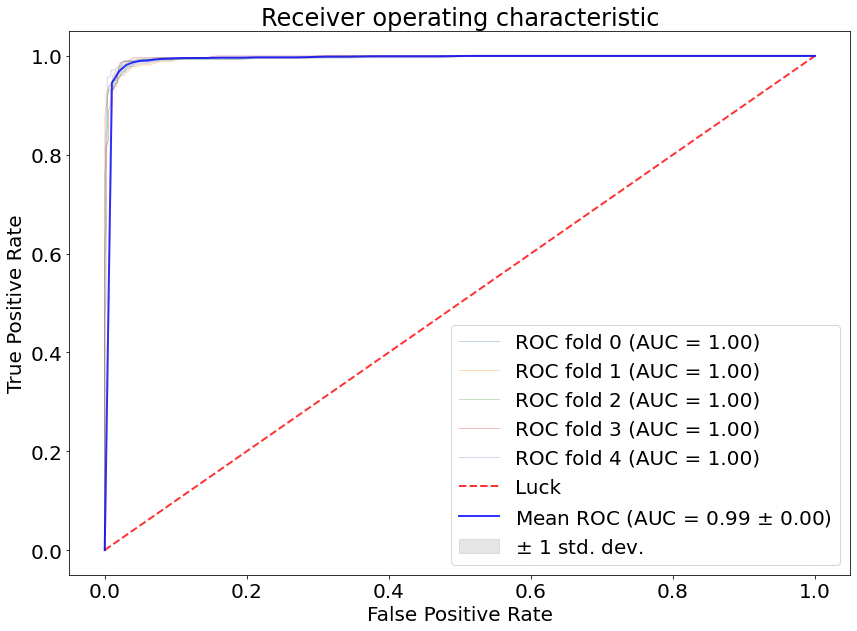

,AUC Train,AUC Test
0,1.0,0.996636
1,1.0,0.996547
2,1.0,0.996128
3,1.0,0.996829
4,1.0,0.996509


In [128]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, Y), range(5)):
    model_7 = Pipeline([('vectorizer',tvec),('classifier',rfc)])
    model_7.fit(X.iloc[train], Y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [144]:
y_pred10 = model_7.predict(X_test)

In [145]:
len(y_pred10)

420

In [146]:
print("Accuracy : ", accuracy_score(y_pred10,Y_test))

Accuracy :  0.9928571428571429


In [147]:
y_pred11 = model_7.predict(testX)

In [148]:
len(y_pred11)

1014

In [149]:
len(tesY)

1014

In [150]:
print("Accuracy : ", accuracy_score(y_pred11,tesY))

Accuracy :  0.9289940828402367
